Visão geral dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None

Primeiras linhas do dataset:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss.

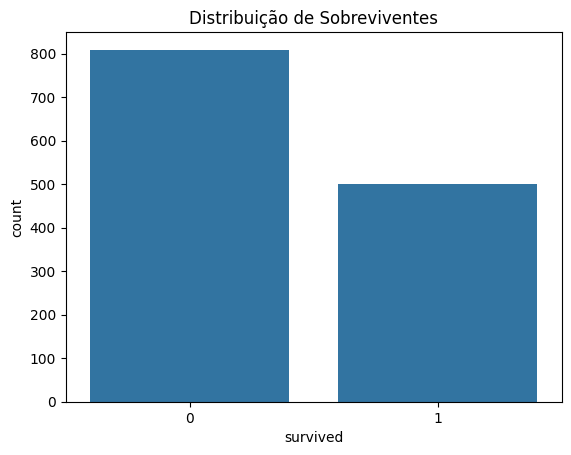

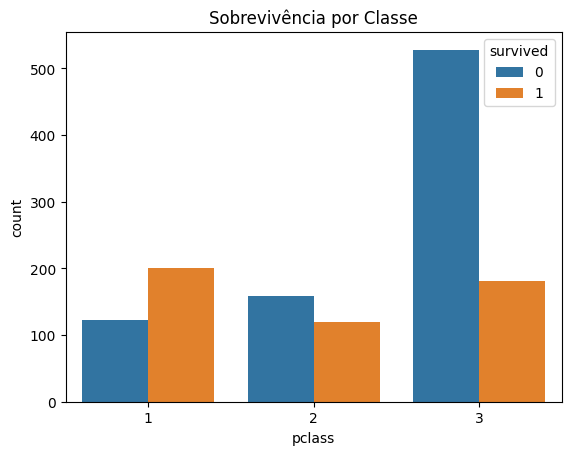

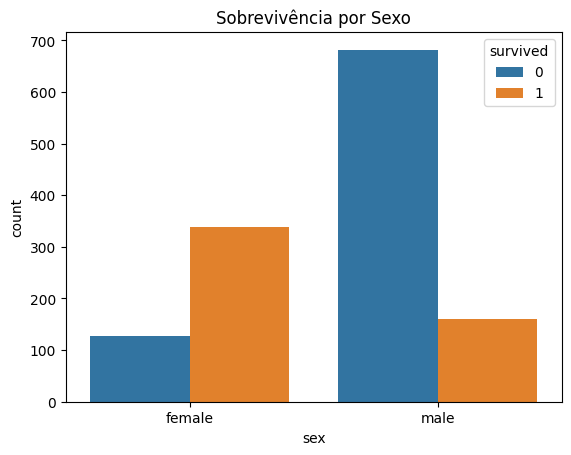

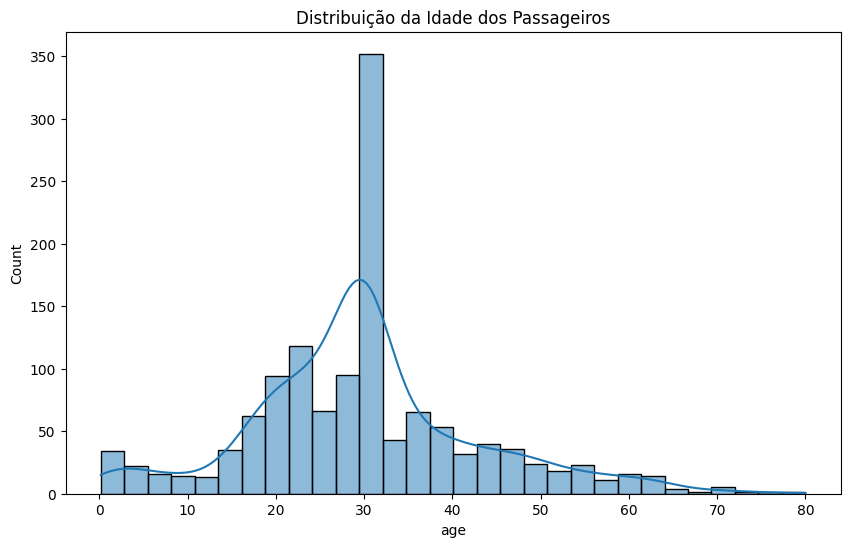

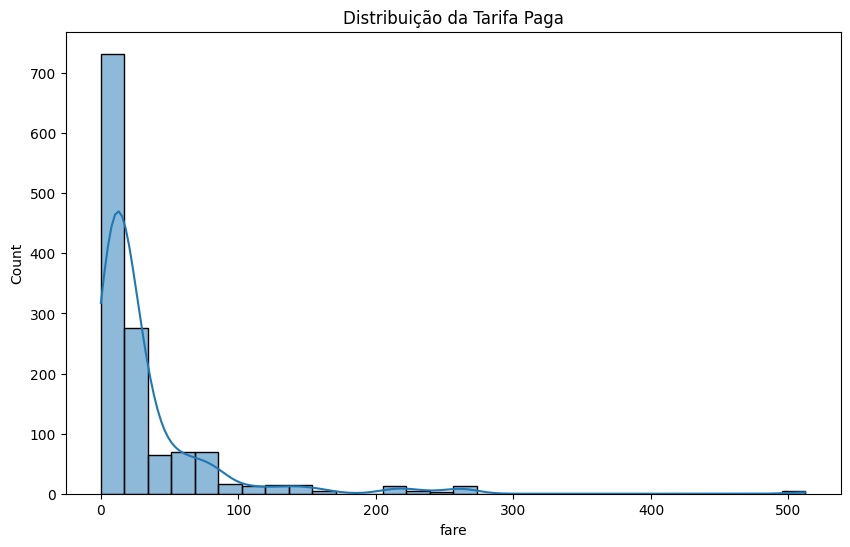

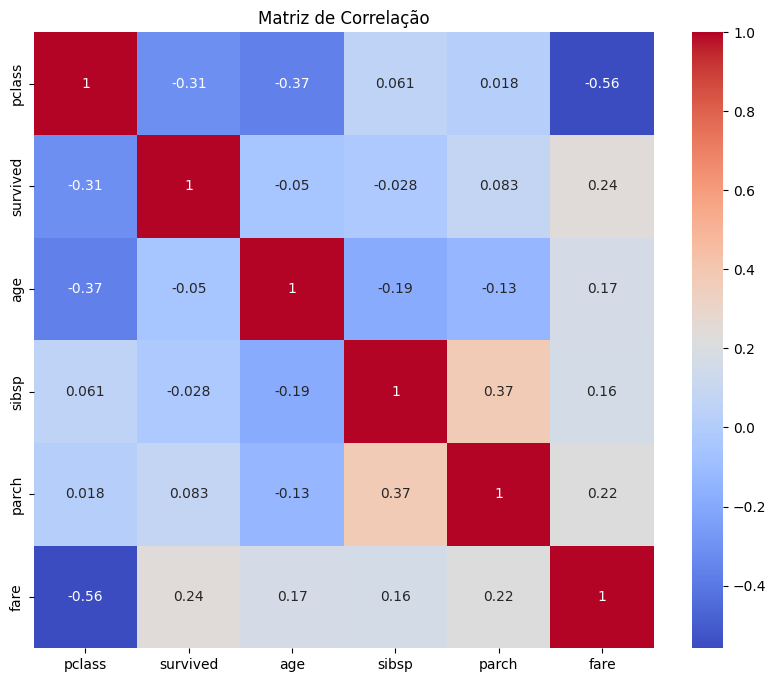


Taxa de sobrevivência por classe:
pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

Taxa de sobrevivência por sexo:
sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

Taxa de sobrevivência por grupo de idade:
age_group
Criança/Adolescente    0.492228
Jovem                  0.350126
Adulto                 0.392070
Idoso                  0.400000
Name: survived, dtype: float64


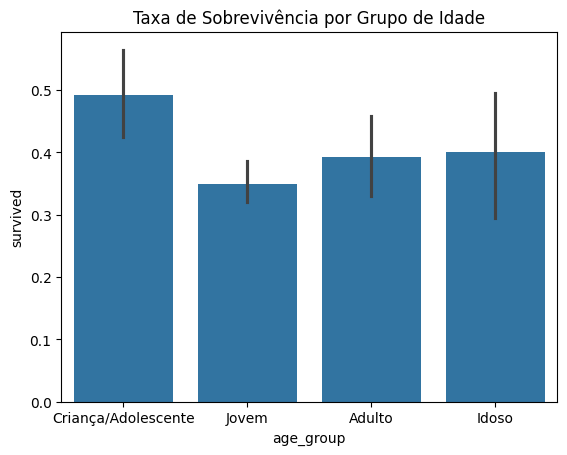


Análise concluída!


In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
# Certifique-se de que o arquivo 'titanic3.csv' está no mesmo diretório deste script
df = pd.read_csv('dados_titanic.csv')

# 1. VISÃO GERAL DOS DADOS
print("Visão geral dos dados:")
print(df.info())  # Informações sobre o tipo de dados e valores não nulos
print("\nPrimeiras linhas do dataset:")
print(df.head())  # Exibe as primeiras linhas para entender a estrutura dos dados
print("\nResumo estatístico:")
print(df.describe())  # Estatísticas descritivas para colunas numéricas

# 2. TRATAMENTO DE DADOS FALTANTES
print("\nVerificando valores faltantes:")
print(df.isnull().sum())  # Contagem de valores faltantes por coluna

# Preenchendo valores faltantes em 'age' com a média
df['age'] = df['age'].fillna(df['age'].mean())

# Preenchendo valores faltantes em 'fare' com a mediana
df['fare'] = df['fare'].fillna(df['fare'].median())

# Preenchendo valores faltantes em 'embarked' com a moda (valor mais frequente)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Removendo colunas com muitos valores faltantes ou pouco úteis para a análise
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

# Verificando novamente os valores faltantes após o tratamento
print("\nValores faltantes após o tratamento:")
print(df.isnull().sum())

# 3. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)
# Distribuição de sobreviventes
print("\nDistribuição de sobreviventes:")
print(df['survived'].value_counts())

# Visualizando a distribuição de sobreviventes
sns.countplot(x='survived', data=df)
plt.title('Distribuição de Sobreviventes')
plt.show()

# Sobrevivência por classe
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Sobrevivência por Classe')
plt.show()

# Sobrevivência por sexo
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Sobrevivência por Sexo')
plt.show()

# Idade dos passageiros
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribuição da Idade dos Passageiros')
plt.show()

# Tarifa paga pelos passageiros
plt.figure(figsize=(10, 6))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Distribuição da Tarifa Paga')
plt.show()

# Correlação entre variáveis numéricas
# Calculando a matriz de correlação apenas para colunas numéricas
numeric_columns = df.select_dtypes(include=[np.number])  # Seleciona apenas colunas numéricas
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# 4. ANÁLISE DE PADRÕES E INSIGHTS
# Taxa de sobrevivência por classe
survival_rate_by_class = df.groupby('pclass')['survived'].mean()
print("\nTaxa de sobrevivência por classe:")
print(survival_rate_by_class)

# Taxa de sobrevivência por sexo
survival_rate_by_sex = df.groupby('sex')['survived'].mean()
print("\nTaxa de sobrevivência por sexo:")
print(survival_rate_by_sex)

# Sobrevivência por idade
# Dividindo os passageiros em grupos de idade
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 100], labels=['Criança/Adolescente', 'Jovem', 'Adulto', 'Idoso'])
survival_rate_by_age_group = df.groupby('age_group', observed=False)['survived'].mean()
print("\nTaxa de sobrevivência por grupo de idade:")
print(survival_rate_by_age_group)

# Visualizando a taxa de sobrevivência por grupo de idade
sns.barplot(x='age_group', y='survived', data=df)
plt.title('Taxa de Sobrevivência por Grupo de Idade')
plt.show()

# 5. CONCLUSÕES
# Resumindo os principais insights:
# - Passageiros da primeira classe tiveram maior taxa de sobrevivência.
# - Mulheres tiveram maior taxa de sobrevivência em comparação com homens.
# - Crianças e adolescentes apresentaram maior taxa de sobrevivência.
# - A tarifa paga parece estar correlacionada com a sobrevivência, possivelmente devido à classe.

print("\nAnálise concluída!")